# Sissejuhatus "Pandas" teeki
Programmeerimisteek on justkui omaette tööriistakast, mis sisaldab erinevaid tööriistu (funktsioone) mingi konkreetse eesmärgi saavutamiseks.

[Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) on vabavara, mis võimaldab andmetabeleid (*data frames*) luua ja töödelda.

Programmeerimisteekide kasutamiseks tuleb need esmalt installeerida ja seejärel importida. Colab on meie eest paljud teegid juba installeerinud ja seetõttu piisab vaid importimisest. Pandas teek imporditakse tavaliselt järgneva käsuga:

In [1]:
import pandas as pd

# Andmetabeli (DataFrame) loomine
DataFrame on andmetabel. Alljärgnevas näites loome DataFrame'i, kus iga rida vastab ühele inimesele ja veergudes on inimeste kohta käiv info.

In [2]:
inimesed = pd.DataFrame({
    'nimi': ["Mart", "Tõnu", "Jüri", "Mari", "Maarika"],
    'vanus': [22, 24, 26, 22, 29],
    'elukoht': ['Tartu', 'Tõrva', 'Paide', "Tallinn", "Narva"]
})
inimesed

nimi  vanus  elukoht
0     Mart     22    Tartu
1     Tõnu     24    Tõrva
2     Jüri     26    Paide
3     Mari     22  Tallinn
4  Maarika     29    Narva

# Andmete importimine
Andmeteadur ei loo enamusel juhtudel andmeid ise, vaid impordib need kas andmebaasist, veebist või enda arvutis olevast failist.

Meie impordime allolevas näites .csv faili Avaandmete portaalist saadud andmetega ettevõtete müügitulu ja tasutud maksude kohta. Andmed on eelnevalt salvestatud Github'i.

In [3]:
maksud_2020_url = 'https://raw.githubusercontent.com/kristjan-eljand/andmeteadus_on_popp/main/maksud_2020_iii_kvartal.csv'
maksud_2020 = pd.read_csv(maksud_2020_url)

# Andmete vaatamine

## Andmetabeli esmane vaatamine
Andmete esmaseks vaatamiseks piisab vaid andmetabeli nime kirjutamisest ja avamisest.

In [4]:
maksud_2020

reg_code  ... employees
0       10000018  ...     200.0
1       10000024  ...      10.0
2       10000062  ...       NaN
3       10000127  ...       2.0
4       10000165  ...      44.0
...          ...  ...       ...
141706  KK106569  ...       3.0
141707  MM000001  ...       1.0
141708  MM000047  ...       1.0
141709  OO000012  ...       NaN
141710  QQ000003  ...       3.0

[141711 rows x 10 columns]

## Andmetabeli kuju ehk ridade ja veergude arvu vaatamine
Andmetabeli atribuut **`shape`** annab meile andmetabeli ridade ja veergude arvu.

In [5]:
maksud_2020.shape

(141711, 10)

## Andmetabeli üldkirjelduse vaatamine
Funktsioon `describe()` võimaldab esitada andmetabeli kõigi veergude üldstatistika.

In [6]:
maksud_2020.describe(include='all')

reg_code          name  ...       revenue     employees
count     141711        141711  ...  9.850800e+04  95893.000000
unique    141711        141700  ...           NaN           NaN
top     11877663  LEEMETI TALU  ...           NaN           NaN
freq           1             3  ...           NaN           NaN
mean         NaN           NaN  ...  1.967757e+05      7.132648
std          NaN           NaN  ...  2.355235e+06     48.191981
min          NaN           NaN  ... -4.706420e+05      1.000000
25%          NaN           NaN  ...  8.910000e+02      1.000000
50%          NaN           NaN  ...  9.847500e+03      2.000000
75%          NaN           NaN  ...  4.425950e+04      4.000000
max          NaN           NaN  ...  2.500086e+08   4636.000000

[11 rows x 10 columns]

## Andmetabeli sortimine
Me saame järjestada andmetabeli read mingi konkreetse veeru väärtuste järgi meetodiga `sort_values(by='veerunimi')`.

Alljärgneva näites järjestame tabeli müügitulu järgi kahanevas järjekorras.

In [7]:
maksud_2020.sort_values(by='revenue', ascending=False)

reg_code  ... employees
144     10005211  ...    1669.0
120818  14945253  ...       6.0
11235   10421629  ...     926.0
18265   10765896  ...    3652.0
23390   10960209  ...       8.0
...          ...  ...       ...
141701  BB000751  ...       1.0
141703  BB000769  ...       1.0
141707  MM000001  ...       1.0
141708  MM000047  ...       1.0
141709  OO000012  ...       NaN

[141711 rows x 10 columns]

# Andmete valimine

## Ühe veeru valimine
Ühe konkreetse veeru vaatamiseks sisesta `andmetabel.veerunimi`. Sama tulemuse saame ka, kui sisestame `andmetabel['veerunimi']`

In [10]:
maksud_2020.revenue

0               NaN
1          107661.0
2           22180.0
3          125015.0
4         1424944.0
            ...    
141706     232580.0
141707          NaN
141708          NaN
141709          NaN
141710      67097.0
Name: revenue, Length: 141711, dtype: float64

## Mitme veeru valimine
Mitme veeru vaatamiseks sisesta `andmetabel[['veerunimi1', 'veerunimi2']]`

In [11]:
veerud_mida_valida = ['revenue', 'employees']
maksud_2020[veerud_mida_valida]

revenue  employees
0             NaN      200.0
1        107661.0       10.0
2         22180.0        NaN
3        125015.0        2.0
4       1424944.0       44.0
...           ...        ...
141706   232580.0        3.0
141707        NaN        1.0
141708        NaN        1.0
141709        NaN        NaN
141710    67097.0        3.0

[141711 rows x 2 columns]

## Ühe rea valimine


Konkreetse rea valimiseks rea numbri järgi kasutame `iloc[reanumber]` meetodit.  

In [ ]:
maksud_2020

In [13]:
maksud_2020.iloc[0]

reg_code                                                 10000018
name                                      AMSERV AUTO AKTSIASELTS
type                                                     Äriühing
vat_registry                                                  jah
emtak           HULGI- JA JAEKAUBANDUS; MOOTORSÕIDUKITE JA MOO...
county                                          Harju ( Tallinn )
national_tax                                               554244
employee_tax                                               561984
revenue                                                       NaN
employees                                                     200
Name: 0, dtype: object

## Tingimuslik andmete valimine
Alljärgnevas näites valime ainult need read, kelle müügitulu on suurem kui 1 000 000 Eurot.

In [14]:
mil_companies = maksud_2020['revenue'] > 1000000

maksud_2020[mil_companies]

reg_code                          name  ...    revenue employees
4       10000165         KIVIÕLI KAUBAHOOV, AS  ...  1424944.0      44.0
6       10000248  ITW CONSTRUCTION PRODUCTS OÜ  ...  1101371.0       6.0
7       10000356                    ESTIKO, AS  ...  1972125.0      18.0
8       10000372           SAARIOINEN EESTI OÜ  ...  5304927.0     140.0
12      10000515           B.BRAUN MEDICAL, OÜ  ...  3376898.0      32.0
...          ...                           ...  ...        ...       ...
141667  BB000449            LUFTHANSA CARGO AG  ...  2283290.0       NaN
141681  BB000592        LÖVANGER ELEKTRONIK AB  ...  1962536.0       NaN
141687  BB000623       COVESTRO DEUTSCHLAND AG  ...  3407548.0       NaN
141689  BB000637          MICHELIN POLSKA S.A.  ...  1985304.0       NaN
141704  BB000770                AMAZON EU SARL  ...  1236533.0       NaN

[2692 rows x 10 columns]

Sarnaselt saame valida ka ainult ettevõtted, mis asuvad Harju maakonnas Tallinnas.

In [15]:
maksud_2020[maksud_2020['county'] == 'Harju ( Tallinn )']

reg_code  ... employees
0       10000018  ...     200.0
1       10000024  ...      10.0
6       10000248  ...       6.0
9       10000395  ...       6.0
12      10000515  ...      32.0
...          ...  ...       ...
141605  90014968  ...       NaN
141608  98000026  ...       NaN
141642  BB000170  ...       2.0
141660  BB000353  ...       NaN
141677  BB000529  ...      10.0

[59359 rows x 10 columns]

# Andmete lisamine
Alljärgnevas näites lisame uue veeru nimega "quarter" koos väärtusega 2020_III, kuna meie andmed käivad 2020. aasta kolmanda kvartali kohta.

In [16]:
maksud_2020['quarter'] = '2020_III'
maksud_2020

reg_code  ...   quarter
0       10000018  ...  2020_III
1       10000024  ...  2020_III
2       10000062  ...  2020_III
3       10000127  ...  2020_III
4       10000165  ...  2020_III
...          ...  ...       ...
141706  KK106569  ...  2020_III
141707  MM000001  ...  2020_III
141708  MM000047  ...  2020_III
141709  OO000012  ...  2020_III
141710  QQ000003  ...  2020_III

[141711 rows x 11 columns]

# Puuduvate andmetega tegelemine

## Puuduvate väärtuste leidmine
Alljärgnevas näites leiame kõik puuduvad väärtused.

In [17]:
maksud_2020.isna()

reg_code   name   type  ...  revenue  employees  quarter
0          False  False  False  ...     True      False    False
1          False  False  False  ...    False      False    False
2          False  False  False  ...    False       True    False
3          False  False  False  ...    False      False    False
4          False  False  False  ...    False      False    False
...          ...    ...    ...  ...      ...        ...      ...
141706     False  False  False  ...    False      False    False
141707     False  False  False  ...     True      False    False
141708     False  False  False  ...     True      False    False
141709     False  False  False  ...     True       True    False
141710     False  False  False  ...    False      False    False

[141711 rows x 11 columns]

Loetavuse parandamiseks summeerime kõikide veergude väärtused - kõik `True` väärtused = 1 ja kõik `False` väärtused = 0, mis tähendab, et meie tulemus näitab kõigi `True` väärtuste ehk puuduvate väärtuste arvu.

In [18]:
maksud_2020.isna().sum()

reg_code            0
name                0
type                0
vat_registry        0
emtak            3311
county          10599
national_tax    33194
employee_tax    33194
revenue         43203
employees       45818
quarter             0
dtype: int64

## Puuduvate väärtuste eemaldamine
Puuduvaid väärtusi saame eemaldada meetodiga `dropna()`. Alljärgnevas näites eemaldame kõik ettevõtted (read), kellel puudub müügitulu väärtus.

In [19]:
maksud_2020.dropna(axis=0, how='any', subset=['revenue'])

reg_code                   name  ... employees   quarter
1       10000024       EESTI RAAMAT, OÜ  ...      10.0  2020_III
2       10000062            ALDO KOPPEL  ...       NaN  2020_III
3       10000127     ARAVETE APTEEK, TÜ  ...       2.0  2020_III
4       10000165  KIVIÕLI KAUBAHOOV, AS  ...      44.0  2020_III
5       10000219               YEAR, AS  ...      16.0  2020_III
...          ...                    ...  ...       ...       ...
141702  BB000766  EAGLE CONTINENTAL LLP  ...       NaN  2020_III
141704  BB000770         AMAZON EU SARL  ...       NaN  2020_III
141705  KK106568     SEGERS FABRIKER AB  ...       NaN  2020_III
141706  KK106569     PACKDALE GROUP LLC  ...       3.0  2020_III
141710  QQ000003           RAUMASTER OY  ...       3.0  2020_III

[98508 rows x 11 columns]

## Puuduvate väärtuste asendamine
Samas on meil võimalik ka puuduvaid väärtusi asendada, kasutades meetodit `fillna()`. 
Alljärgnevas näites asendame kõik puuduvad müügitulu väärtused nulliga.

In [20]:
maksud_2020.revenue.fillna(value=0)

0               0.0
1          107661.0
2           22180.0
3          125015.0
4         1424944.0
            ...    
141706     232580.0
141707          0.0
141708          0.0
141709          0.0
141710      67097.0
Name: revenue, Length: 141711, dtype: float64

# Statistilised operatsioonid

## Keskväärtuse leidmine
Alljärgnevas näites leiame kõigi numbriliste veergude keskväärtused

In [21]:
maksud_2020.mean(numeric_only=True)

national_tax     24552.314043
employee_tax     12988.291788
revenue         196775.697131
employees            7.132648
dtype: float64

# Histogram
Väga lihtsalt saame leida ka väärtuste arvu jaotuse meetodiga `value_counts()`. Alljärgnevas näites loeme kokku ettevõtted maakondade kaupa.

In [22]:
maksud_2020.county.value_counts()

Harju ( Tallinn )          59359
Tartu ( Tartu linn )        9204
Pärnu ( Pärnu linn )        4749
Harju ( Viimsi vald )       2761
Saare ( Saaremaa vald )     2735
                           ...  
Saare ( Muhu vald )          196
Harju ( Loksa linn )          97
Pärnu ( Kihnu vald )          65
Lääne ( Vormsi vald )         57
Saare ( Ruhnu vald )           8
Name: county, Length: 79, dtype: int64

# Andmetabelite ühendamine

Esmalt impordime ka maksuandmed 2021 aasta kohta ning lisame ka kvartali numbri, et andmete ühendamise järgselt oleks aru saada, milline väärtus käib millise perioodi kohta.

In [23]:
maksud_2021_url = 'https://raw.githubusercontent.com/kristjan-eljand/andmeteadus_on_popp/main/maksud_2021_iii_kvartal.csv'
maksud_2021 = pd.read_csv(maksud_2021_url)

# Lisame ka kvartali numbri
maksud_2021['quarter'] = '2021_III'

2021. aasta andmet lisamiseks 2020. aasta andmetabelile kasutame meetodid `concat`.

In [24]:
# Loome uue andmetabeli nimega "maksud", kus 2020. ja 2021. aasta 
# andmed on ühendatud
andmestikud = [maksud_2020, maksud_2021]
maksud = pd.concat(andmestikud)
maksud

reg_code  ...   quarter
0       10000018  ...  2020_III
1       10000024  ...  2020_III
2       10000062  ...  2020_III
3       10000127  ...  2020_III
4       10000165  ...  2020_III
...          ...  ...       ...
147252  BB000770  ...  2021_III
147253  KK106568  ...  2021_III
147254  MM000001  ...  2021_III
147255  MM000047  ...  2021_III
147256  QQ000003  ...  2021_III

[288968 rows x 11 columns]

# Andmete grupeerimine
Grupeerimine tähendab andmete jaotamist gruppidesse mingi kriteeriumi alusel.

Alljärgnev näites grupeerime andmed kvartalinumbri alusel ning summeerime kõigi ettevõtete müügitulud.

In [25]:
maksud.groupby(by='quarter').sum()

national_tax  employee_tax       revenue  employees
quarter                                                      
2020_III  2.664343e+09  1.409450e+09  1.938398e+10   683971.0
2021_III  2.964568e+09  1.557259e+09  2.438036e+10   668106.0

Me saame grupeerida ka mitme tunnuse alusel. Alljärgnevas näites grupeerime ettevõtte tegevusvaldkonna `emtak` ja kvartali `quarter` alusel ja leiame taas summad.

In [26]:
maksud.groupby(['emtak', 'quarter']).sum()

national_tax  ...  employees
emtak                                              quarter                 ...           
 AVALIK HALDUS JA RIIGIKAITSE; KOHUSTUSLIK SOTS... 2020_III   315362654.0  ...    28195.0
AVALIK HALDUS JA RIIGIKAITSE; KOHUSTUSLIK SOTSI... 2021_III   278982967.0  ...    29253.0
EHITUS                                             2020_III   160967143.0  ...    53089.0
                                                   2021_III   180173527.0  ...    52396.0
EKSTERRITORIAALSETE ORGANISATSIOONIDE JA ÜKSUST... 2020_III       21314.0  ...        9.0
                                                   2021_III       22138.0  ...       10.0
ELEKTRIENERGIA, GAASI, AURU JA KONDITSIONEERITU... 2020_III    44920545.0  ...     4838.0
                                                   2021_III    44481675.0  ...     4510.0
FINANTS- JA KINDLUSTUSTEGEVUS                      2020_III    72238162.0  ...    13430.0
                                                   2021_III    81152769.0  ...    12534.0
HALDUS- JA ABITEGEVUSED                            2020_III    83901047.0  ...    40497.0
                                                   2021_III   100859320.0  ...    40904.0
HARIDUS                                            2020_III    70841854.0  ...    67783.0
                                                   2021_III    78669628.0  ...    69387.0
HULGI- JA JAEKAUBANDUS; MOOTORSÕIDUKITE JA MOOT... 2020_III   754239381.0  ...    97290.0
                                                   2021_III   847094135.0  ...    95601.0
INFO JA SIDE                                       2020_III   138252812.0  ...    30030.0
                                                   2021_III   180655907.0  ...    30541.0
KINNISVARAALANE TEGEVUS                            2020_III    92451240.0  ...    23789.0
                                                   2021_III    82661943.0  ...    17505.0
KODUMAJAPIDAMISTE KUI TÖÖANDJATE TEGEVUS; KODUM... 2020_III        1038.0  ...        5.0
                                                   2021_III         761.0  ...        4.0
KUNST, MEELELAHUTUS JA VABA AEG                    2020_III    34157853.0  ...    21181.0
                                                   2021_III    40438036.0  ...    20063.0
KUTSE-, TEADUS- JA TEHNIKAALANE TEGEVUS            2020_III   100191200.0  ...    36495.0
                                                   2021_III   123184637.0  ...    32378.0
MAJUTUS JA TOITLUSTUS                              2020_III    37057967.0  ...    25466.0
                                                   2021_III    42020277.0  ...    25446.0
MUUD TEENINDAVAD TEGEVUSED                         2020_III    18573231.0  ...    16830.0
                                                   2021_III    21946045.0  ...    14795.0
MÄETÖÖSTUS                                         2020_III    11195038.0  ...     2937.0
                                                   2021_III    10391648.0  ...     2087.0
PÕLLUMAJANDUS, METSAMAJANDUS JA KALAPÜÜK           2020_III    49764140.0  ...    16379.0
                                                   2021_III    63618682.0  ...    15536.0
TERVISHOID JA SOTSIAALHOOLEKANNE                   2020_III    96370237.0  ...    50671.0
                                                   2021_III   109817885.0  ...    51881.0
TÖÖTLEV TÖÖSTUS                                    2020_III   323903600.0  ...   108593.0
                                                   2021_III   361019081.0  ...   108448.0
VEEVARUSTUS; KANALISATSIOON, JÄÄTME- JA SAASTEK... 2021_III    17133600.0  ...     3941.0
VEEVARUSTUS; KANALISATSIOON; JÄÄTME- JA SAASTEK... 2020_III    17909215.0  ...     3908.0
VEONDUS JA LAONDUS                                 2020_III   237634194.0  ...    40866.0
                                                   2021_III   295400010.0  ...    39283.0

[42 rows x 4 columns]

# Andmete ümberstruktureerimine

## Lai andmeformaat
Laia andmeformaadi puhul on ühe ettevõtte kohta 1 rida ning veergude pealkirjad näitavad väärtusi.

Alljärgnevas näites koondame kvartaalse müügitulu eraldi veergudesse.

In [27]:
wide = maksud[['reg_code','quarter', 'revenue']].pivot_table(index='reg_code', columns='quarter', values='revenue')
wide

quarter    2020_III    2021_III
reg_code                       
10000018        NaN  21587224.0
10000024   107661.0    144389.0
10000062    22180.0     27514.0
10000127   125015.0    158317.0
10000165  1424944.0   1582858.0
...             ...         ...
BB000766     1118.0         0.0
BB000770  1236533.0   1230805.0
KK106568   961605.0   1251075.0
KK106569   232580.0         NaN
QQ000003    67097.0     64996.0

[110848 rows x 2 columns]

# Pikk andmeformaat
Pika andmeformaadi puhul võib ühe objekti (ettevõtte) kohta olla mitu rida.

Alljärgnevas näites kasutame meetodit `melt`, et muuta eelnevalt loodud lai formaat pikaks formaadiks (NB: uues tabelis on ridade arv 2x suurem kui esialgses)

In [28]:
wide.melt(
    value_vars=['2020_III', '2021_III'], 
    var_name='quarter',
    value_name='revenue',
    ignore_index=False
    )

quarter    revenue
reg_code                     
10000018  2020_III        NaN
10000024  2020_III   107661.0
10000062  2020_III    22180.0
10000127  2020_III   125015.0
10000165  2020_III  1424944.0
...            ...        ...
BB000766  2021_III        0.0
BB000770  2021_III  1230805.0
KK106568  2021_III  1251075.0
KK106569  2021_III        NaN
QQ000003  2021_III    64996.0

[221696 rows x 2 columns]

## Eri struktuuriga andmestiku ühtlustamine
Mõnikord võivad meie algandmed olla sellised, et ühes lahtris on kolm väärtust ja teises lahtris vaid 1 väärtus.

In [29]:
inimesed = pd.DataFrame({
    'nimi': ['Mart', 'Jüri', 'Mari'],
    'reisid': [['Pariis', 'London'], ['Riia'], ['Vilnius', 'Brüssel', 'Berliin']]
})
inimesed

nimi                       reisid
0  Mart             [Pariis, London]
1  Jüri                       [Riia]
2  Mari  [Vilnius, Brüssel, Berliin]

Meetod `explode` võimaldab ühtlustada sellise tabeli.

In [30]:
inimesed.explode(column='reisid')

nimi   reisid
0  Mart   Pariis
0  Mart   London
1  Jüri     Riia
2  Mari  Vilnius
2  Mari  Brüssel
2  Mari  Berliin

# Graafikud
Alljärgnevalt on toodud näide müügitulu andmete grupeerimisest kvartali järgi ja tulemuste kandmisest graafikule meetodiga `plot`

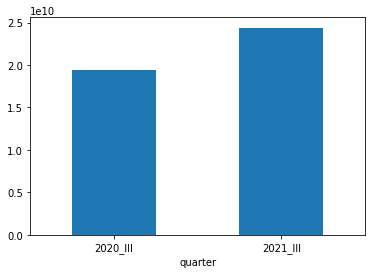

In [31]:
import matplotlib.pyplot as plt

yoy_revenue = maksud.groupby(['quarter']).sum()['revenue']
yoy_revenue.plot(kind='bar', rot=0)

# Tulemuste salvestamine faili
Pandas võimaldab kirjutada tulemused nii .csv, .xlsk kui ka teistesse failiformaatidesse. 

Alljärgnevas näites grupeerime andmed tegevusala ja kvartali järgi ja kirjutame tulemuse .csv faili.


In [ ]:
emtak_quarter_maksud = maksud.groupby(['emtak','quarter']).sum()
emtak_quarter_maksud.to_csv("Maksud tegevusvaldkonna ja kvartali järgi 2020 vs 2021.csv")
